# Spearman's Rho


Spearman's $\rho$ is non-parametric correlation coefficient.  It is also known as the rank-correlation, we'll say more about that later.  

You say, "But! This is a categorical data class and correlation measures the relationship between two quantitative variables!"

You're right. However, Spearman's $\rho$ can be used to measure the correlation between two ordinal categorical variables.  Let's see how it works by using a couple of examples from this data set from Kaggle on [Salaries in Data Science](https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023/data).  

Once we get the data loaded, the first thing we'll do is cut it down to just one group of data scientists.  We'll save the other groups for the homework.  

In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import scipy.stats as stats

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=np.VisibleDeprecationWarning)

salary = Table.read_table("ds_salaries.csv")

salary

work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [3]:
datascientist = salary.where("job_title", "Data Scientist")

datascientist

work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M
2023,SE,FT,Data Scientist,90700,USD,90700,US,0,US,M
2023,SE,FT,Data Scientist,170000,USD,170000,US,0,US,M
2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
2023,SE,FT,Data Scientist,212750,USD,212750,US,100,US,M
2023,SE,FT,Data Scientist,185000,USD,185000,US,100,US,M


In [19]:
comp_size = datascientist.column("company_size")

size = (comp_size == 'S') + 2*(comp_size == "M") + 3*(comp_size == "L")

size

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1,

In [20]:
stats.spearmanr(size, datascientist.column("salary_in_usd"))

SpearmanrResult(correlation=-0.071677313936961917, pvalue=0.037802999364247865)

In [21]:
size2 = (comp_size == 'S') + 20*(comp_size == "M") + 300*(comp_size == "L")

size2

array([ 20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,
        20,  20,  20,  20,  20,  20,  20,  20,  20, 300,  20,  20,  20,
        20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,
        20,  20,  20,  20,  20,  20, 300, 300,  20,  20, 300,  20,  20,
        20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,
        20,  20,  20,  20,  20, 300,  20,  20,  20,  20,  20,  20,  20,
        20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,
        20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,
        20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,
        20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,
        20,  20,  20,  20,  20,  20,  20,  20,  20, 300,  20,  20,  20,
        20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,
        20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,
        20, 300,  20,  20,  20,  20,  20,  20,  20,  20,  20,  2

In [18]:
stats.spearmanr(size2, datascientist.column("salary_in_usd"))

SpearmanrResult(correlation=-0.071677313936961917, pvalue=0.037802999364247865)

## Why we don't use Pearson's 

Pearson's $r$, the traditional correlation coefficient, is NOT appropriate to use with ordinal data.  It changes based on how you label the levels.  

In [22]:
stats.pearsonr(size, datascientist.column("salary_in_usd"))

PearsonRResult(statistic=-0.055957945304209507, pvalue=0.10508837727300396)

In [23]:
stats.pearsonr(size2, datascientist.column("salary_in_usd"))

PearsonRResult(statistic=-0.19662140656245025, pvalue=9.120274844091658e-09)

In [24]:
salary.column("experience_level")

array(['SE', 'MI', 'MI', ..., 'EN', 'EN', 'SE'],
      dtype='<U2')

In [25]:
salary.group("experience_level")

experience_level,count
EN,320
EX,114
MI,805
SE,2516


# Work experience in data science

There is a variable in this data set called experience_level.  I believe the codes work like this

+ EN means entry level
+ MI mid level
+ SE senior level
+ EX expert level

Assuming I'm right about that, let's treat this as an ordinal variable, with the levels in that order. 

In [30]:
level = 1*(datascientist.column("experience_level") == "EN") + 2*(datascientist.column("experience_level") == "MI") + 3*(datascientist.column("experience_level") == "SE") + 4*(datascientist.column("experience_level") == "EX") 

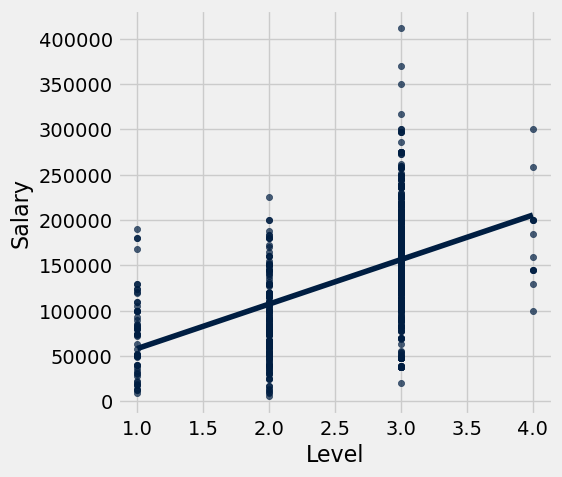

In [32]:
Table().with_columns("Level", level, "Salary", datascientist.column("salary_in_usd")).scatter("Level", fit_line = True)

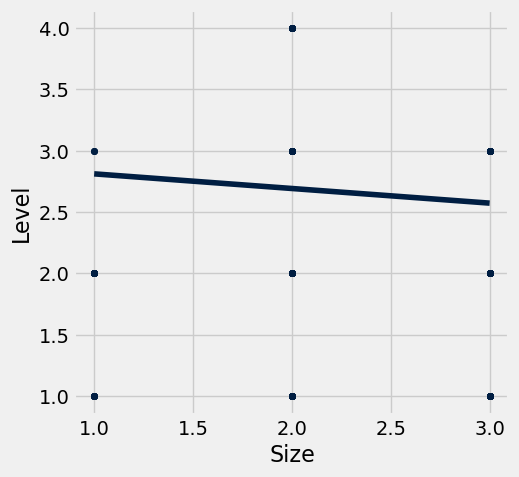

In [40]:
Table().with_columns("Size", size, "Level", level).scatter("Size", fit_line=True)

In [33]:
stats.spearmanr(level, size)

SpearmanrResult(correlation=-0.09398892841635513, pvalue=0.006409960012028963)

### Check this out

Look what happens when we compute the rank for each element and then compute the Pearson $r$ for those arrays.  

In [37]:
stats.rankdata(level)

array([ 524.5,  524.5,  524.5,  524.5,  524.5,  524.5,  524.5,  524.5,
        524.5,  524.5,  524.5,  524.5,  524.5,  524.5,  524.5,  524.5,
        834.5,  834.5,  524.5,  524.5,  524.5,  524.5,  140. ,  524.5,
        524.5,  524.5,  524.5,  524.5,  524.5,  524.5,  524.5,  524.5,
        524.5,  140. ,  140. ,  524.5,  524.5,  524.5,  524.5,  524.5,
        524.5,  524.5,  524.5,  524.5,  524.5,  524.5,  524.5,  524.5,
        524.5,  524.5,  524.5,  524.5,  524.5,  524.5,  524.5,  524.5,
        524.5,  524.5,  524.5,  524.5,  524.5,  524.5,  524.5,  524.5,
        524.5,  524.5,  524.5,  524.5,  524.5,  524.5,   30. ,   30. ,
         30. ,  140. ,  140. ,  524.5,  524.5,  524.5,  524.5,  524.5,
        524.5,  524.5,  524.5,  524.5,  524.5,  140. ,  140. ,  834.5,
        834.5,  524.5,  524.5,  524.5,  524.5,  524.5,  524.5,  524.5,
        524.5,  524.5,  524.5,  524.5,  524.5,  524.5,  524.5,  524.5,
        524.5,  524.5,  524.5,  524.5,  524.5,  524.5,  524.5,  524.5,
      

In [38]:
stats.rankdata(size)

array([ 385. ,  385. ,  385. ,  385. ,  385. ,  385. ,  385. ,  385. ,
        385. ,  385. ,  385. ,  385. ,  385. ,  385. ,  385. ,  385. ,
        385. ,  385. ,  385. ,  385. ,  385. ,  385. ,  791. ,  385. ,
        385. ,  385. ,  385. ,  385. ,  385. ,  385. ,  385. ,  385. ,
        385. ,  385. ,  385. ,  385. ,  385. ,  385. ,  385. ,  385. ,
        385. ,  385. ,  385. ,  385. ,  385. ,  791. ,  791. ,  385. ,
        385. ,  791. ,  385. ,  385. ,  385. ,  385. ,  385. ,  385. ,
        385. ,  385. ,  385. ,  385. ,  385. ,  385. ,  385. ,  385. ,
        385. ,  385. ,  385. ,  385. ,  385. ,  385. ,  791. ,  385. ,
        385. ,  385. ,  385. ,  385. ,  385. ,  385. ,  385. ,  385. ,
        385. ,  385. ,  385. ,  385. ,  385. ,  385. ,  385. ,  385. ,
        385. ,  385. ,  385. ,  385. ,  385. ,  385. ,  385. ,  385. ,
        385. ,  385. ,  385. ,  385. ,  385. ,  385. ,  385. ,  385. ,
        385. ,  385. ,  385. ,  385. ,  385. ,  385. ,  385. ,  385. ,
      

In [39]:
stats.pearsonr(stats.rankdata(level), stats.rankdata(size))

PearsonRResult(statistic=-0.093988928416355116, pvalue=0.0064099600120338159)

You know that in addition to showing you the Python code necessary to compute these statistics, I usually show you the mathematical formula for them too.  

Spearman's $\rho$, Spearman's rank-correlation, is what you get if you put **rank** the data sets and then compute the Pearson's $r$ for those ranks.  

Rank is very similar to order, but not quite.  Consider the following array:

In [ ]:
np.array([1, 2, 2, 5])

The ranks of this data would be np.array([1, 2.5, 2.5, 4]).  The lowest ranked item gets a 1, of course.  Likewise, the highest rank item get the $n$ value where $n$ is the number of items in the set.  **When there are ties**, the same number repeated, that is, the repeated numbers are given the same rank--and that same rank is the average of the "raw ranks" those repeated numbers would have received it they had been slightly different.  

See, the two 2's would have been assigned 2 and 3.  So, they both get the average of 2 and 3, which is 2.5.  

If the array had been np.array([10, 20, 20, 50]), the set of ranks would be the same.  

In [41]:
stats.rankdata(np.array([1,2,2,5]))

array([ 1. ,  2.5,  2.5,  4. ])

In [43]:
stats.rankdata(np.array([10, 20, 20, 50]))

array([ 1. ,  2.5,  2.5,  4. ])

In [45]:
stats.rankdata(np.array([12.2, 13,13,13, 45,45]))

array([ 1. ,  3. ,  3. ,  3. ,  5.5,  5.5])

The traditional Pearson's $r$ can be computed this way:


$$ r = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n} \left(\frac{x_i - \overline{x}}{S_x}\right)\left(\frac{y_i - \overline{y}}{S_y}\right)}$$

So Spearman's $\rho$ is ultimately computed the same way, AFTER converting the raw data into ranks.  Which is why the $\rho$ does not change is we change the labels from 1, 2 and 3 to 10, 20 and 30.  


### The Included Hypothesis Test

This output of `scipy.stats.spearmanr` includes a p-value.  What test is being run?

$H_o: \rho = 0$

$H_a: \rho \not= 0$

$\displaystyle t = \frac{\rho \sqrt{n-2}}{\sqrt{1-\rho^2}}$ and then the p-value is determined using the Student's $t$-distribution with $n-2$ degrees of freedom.  
